In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
inp = pd.read_csv("./Advertising.csv")

In [3]:
inp0= inp[inp.columns[1:]]
inp0

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
inp0.isnull().sum(axis=0)

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [6]:
inp0.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


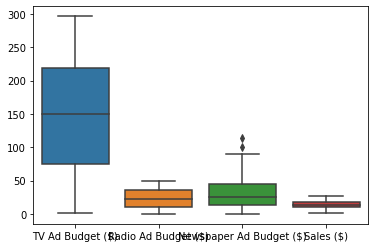

In [7]:
sns.boxplot(inp0[inp0.columns])
plt.show()

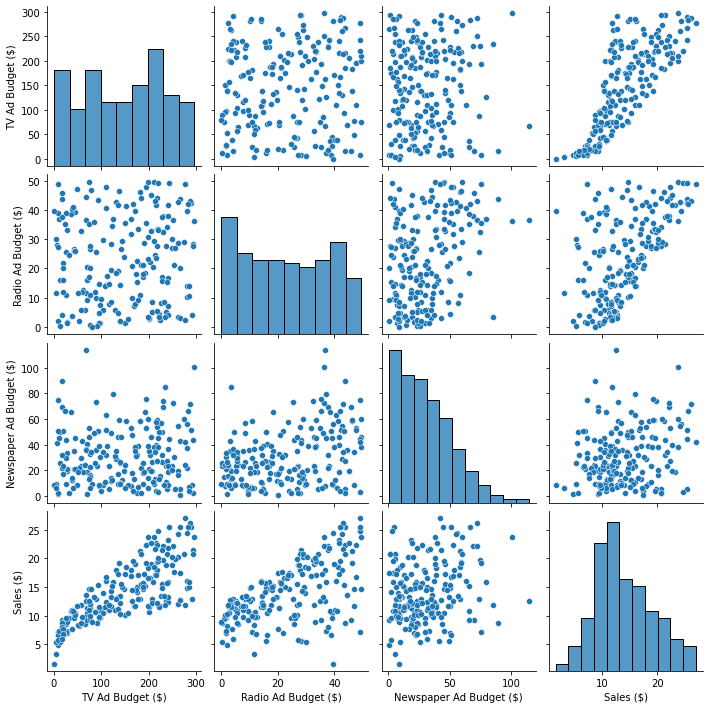

In [8]:
sns.pairplot(data=inp0)

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp0, train_size = 0.7, random_state = 100)


In [10]:
target = 'Sales ($)'
y_train = df_train.pop(target)
X_train = df_train

In [11]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)

In [12]:
model = model.fit()

In [13]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Sales ($)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2277.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                   1.21e-116
Time:                        10:30:14   Log-Likelihood:                         -301.87
No. Observations:                 140   AIC:                                      609.7
Df Residuals:                     137   BIC:                                      618.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TV Ad Budget ($)            0.0523      0.002     33.323      0.000       0.049       0.055
Radio Ad Budget ($)         0.2229      0.012     19.104      0.000       0.200       0.246
Newspaper Ad Budget ($)     0.0192      0.008      2.299      0.023       0.003       0.036
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.346
Skew:                          -0.294   Prob(JB):                       0.0254
Kurtosis:                       3.956   Cond. No.                         13.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y_test = df_test.pop(target)
X_test = df_test

In [15]:
import sklearn.metrics as metrics
y_test_pred= model.predict(X_test)

In [16]:
#Assessing the model using RMSE
print('RMSE: ' ,np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('MSE: ' ,metrics.mean_squared_error(y_test, y_test_pred))

RMSE:  1.8491516420057774
MSE:  3.419361795132663


In [17]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: 7.9573057164513115


In [18]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
   
    
print ('MAE: ' + str(metrics.mean_absolute_error(y_test, y_test_pred) ))
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAE: 1.4248721712214103
MAPE: 13.280862249301817


In [19]:
metrics.r2_score(y_test, y_test_pred)

0.8260688972801438

# Ridge

In [20]:
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridgeReg.fit( X_train,y_train)


Ridge(alpha=0.001)

In [21]:
print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, ridgeReg.predict(X_train))))
print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, ridgeReg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

print ('MPE: ' + str(MPE(y_test_pred,ridgeReg.predict(X_test))) )
print ('MAE: ' + str(metrics.mean_absolute_error(y_test, ridgeReg.predict(X_test)) ))
print ('MAPE: ' + str(MAPE(ridgeReg.predict(X_test),y_test)) )

mean_squared_error train :  1.7985971406104495
mean_squared_error test :  1.3603977325068677
R2 Value/Coefficient of Determination: 0.9058622109339975
MPE: 5.916987398972893
MAE: 1.0638483268527616
MAPE: 9.434088506554309


# Lasso

In [22]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train,y_train)


Lasso(alpha=0.001)

In [23]:
print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, lassoreg.predict(X_train))))
print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

print ('MPE: ' + str(MPE(y_test_pred,lassoreg.predict(X_test))) )
print ('MAE: ' + str(metrics.mean_absolute_error(y_test, lassoreg.predict(X_test)) ))
print ('MAPE: ' + str(MAPE(lassoreg.predict(X_test),y_test)) )

mean_squared_error train :  1.7985971411935906
mean_squared_error test :  1.3603839269506097
R2 Value/Coefficient of Determination: 0.9058641215780945
MPE: 5.917036524634752
MAE: 1.0638380426909433
MAPE: 9.433980772825933


# ElasticNet

In [24]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train,y_train)


ElasticNet(alpha=0.001)

In [25]:
print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, Elastic.predict(X_train))))
print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, Elastic.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test, y_test)))

print ('MPE: ' + str(MPE(y_test_pred,Elastic.predict(X_test))) )
print ('MAE: ' + str(metrics.mean_absolute_error(y_test, Elastic.predict(X_test)) ))
print ('MAPE: ' + str(MAPE(Elastic.predict(X_test),y_test)) )

mean_squared_error train :  1.798597140769297
mean_squared_error test :  1.3603908531987146
R2 Value/Coefficient of Determination: 0.9058631630103013
MPE: 5.91700612293904
MAE: 1.0638409308735428
MAPE: 9.434043527108036
